# 単振動の数値計算

単振動: $\omega > 0 $
$$\frac{d^2 x}{dt^2} = - \omega^2 x.$$

1階の方程式に書き換え:
$$ \frac{dx}{dt} = v,$$
$$ \frac{dv}{dt} = -\omega^2 x.$$


例えば，Heun法で解く:
$\Delta t > 0 $に対し，以下のように離散化される．
$$
\left(
    \begin{array}{c}
        x_{k+1} \\
        v_{k+1}
    \end{array}
\right)
= 
\left(
    \begin{array}{cc}
        1 - \frac{1}{2} \omega^2 (\Delta t)^2 & \Delta t \\
        - \omega^2 \Delta t & 1 - \frac{1}{2} \omega^2 (\Delta t)^2
    \end{array}
\right)
\left(
    \begin{array}{c}
        x_k \\
        v_k
    \end{array}
\right).
$$

In [9]:
omega = 1.0 # パラメータ

dt = 0.01 # 時間刻み幅

# inits
x0 = 1.0
v0 = 0.0

N = 10000 # num. of iterations

t_array = [n*dt for n in 1:N+1]


# Heun法で単振動をdt時間発展する
function evolve_heun(x_old, v_old)
    x = x_old
    v = v_old
    x = (1 - 0.5 * omega^2 * dt^2) * x_old + dt * v_old
    v = - omega^2 * dt * x_old + (1 - 0.5 * omega^2 * dt^2) * v_old

    return x, v
end

# Euler法で単振動をdt時間発展する
function evolve_euler(x_old, v_old)
    x = x_old
    v = v_old
    x = x_old + dt * v_old
    v = - omega^2 * dt * x_old + v_old

    return x, v
end


# Symplectic Euler法で単振動をdt時間発展する
function evolve_sympeuler(x_old, v_old)
    x = x_old
    v = v_old
    v = - alpha^2 * dt * x_old + v_old
    x = x_old + dt * v

    return x, v
end


# Main loop
x_array = [x0]
v_array = [v0]
x = x0
v = v0
for n in 1:N+1
    x, v = evolve_heun(x, v) # Heun法
    # x, v = evolve_euler(x, v) # Euler法
    # x, v = evolve_sympeuler(x, v) # Symplectic Euler法
    push!(x_array, x) # 配列に追加
    push!(v_array, v) # 配列に追加
end

# プロット

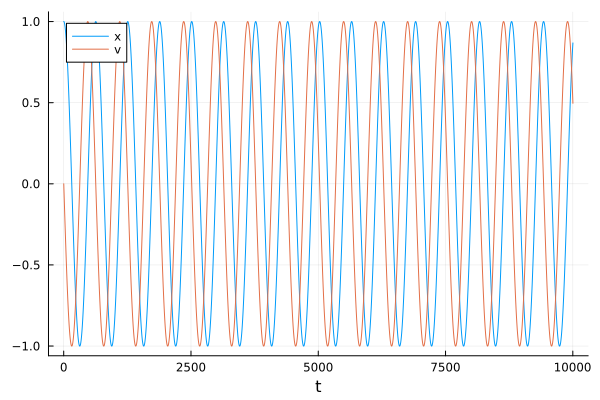

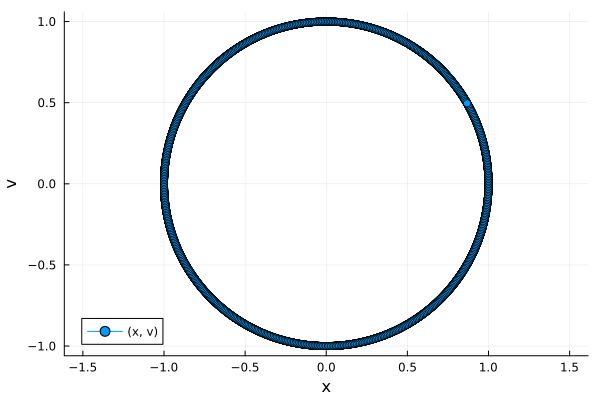

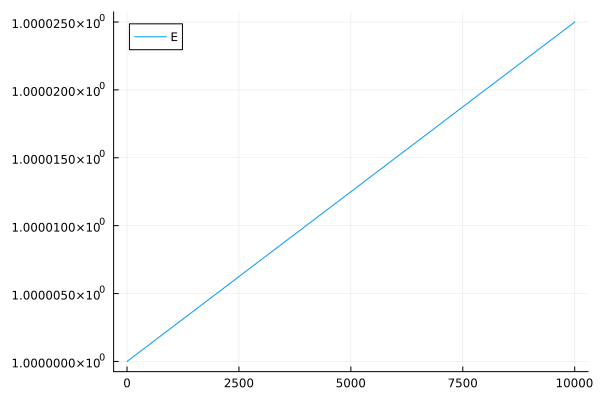

In [10]:
using Plots
gr() # GRバックエンドを使用

# x(t), v(t)をプロット
p1 = plot([x_array v_array], label=["x" "v"], xlabel="t")

# (x, v)平面で軌道をプロット
p2 = plot(x_array, v_array, aspect_ratio=1, marker = :circle, label="(x, v)", xlabel="x", ylabel="v")

# エネルギーの時系列をプロット
E_array = [x_array[n]^2 + v_array[n]^2 for n in 1:N+1]
p3 = plot(E_array, label="E")

# Notebook上で表示
display(p1)
display(p2)
display(p3)
